In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Customer-Churn.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Univariate Analysis

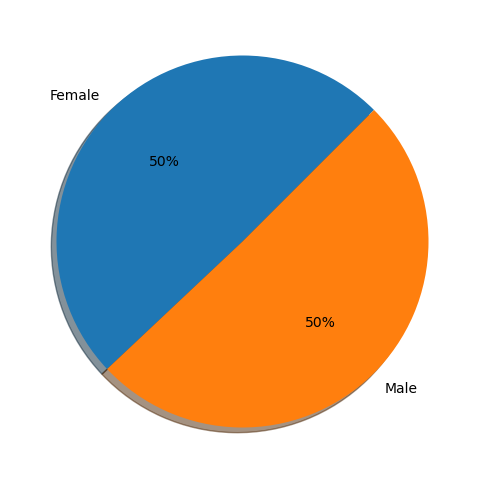

In [7]:
fig,ax = plt.subplots(figsize=(6,8))
count = Counter(df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.0f}%', startangle=45, shadow=True)
plt.show();

# Narrations
On the above pie chart , we have 50 percent female and 50 percent male.

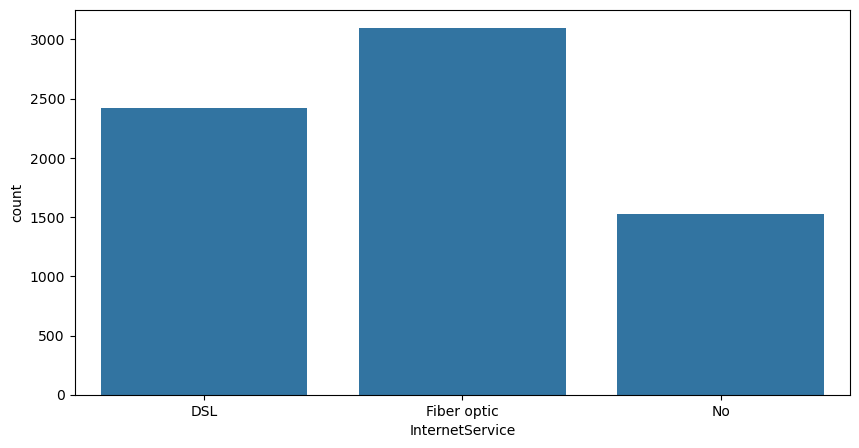

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(x="InternetService", data=df);

## Narrations
* Above 3000 customers uses the Fiber Optic internet which is the fastest and relaible internet service
* Close to 2500 customers uses the DSL service 
* Approximately 1500 uses No internet service


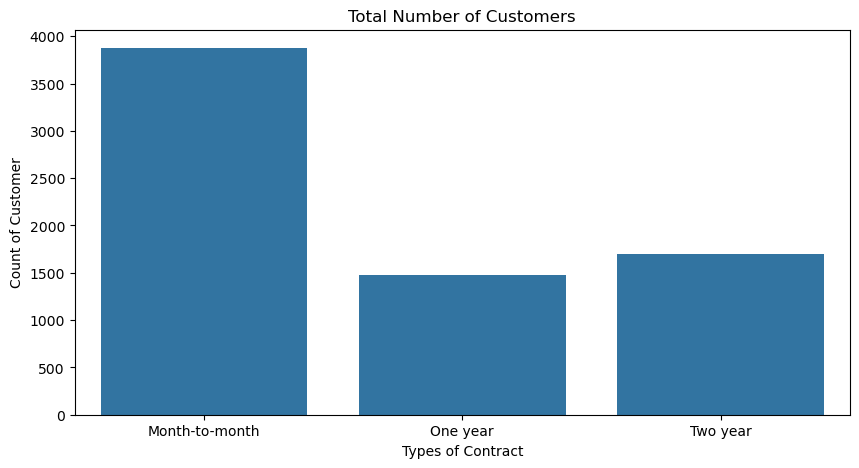

In [9]:
# Investigating the types of contracts
plt.figure(figsize = (10,5))
sns.countplot(x="Contract", data=df)
plt.xlabel("Types of Contract")
plt.ylabel("Count of Customer")
plt.title("Total Number of Customers");

# Narrations
Above 3500 customers subscribes to month to month contract.
Roundabout 1500 customers subscribes to Two year contract
The least is the One year contract which is approximately 1300 customers

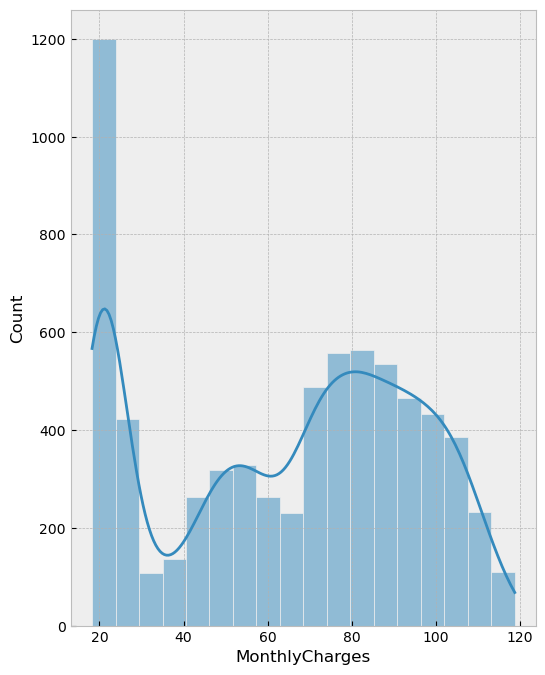

In [10]:
plt.style.use("bmh")
plt.figure(figsize=(6,8))
sns.histplot(df["MonthlyCharges"], kde=True);


## Narrations
* A significant peak at the lower end of the monthly charges, indicating that a large number of customers (1200) are charged a small amount (20 euros) each month.

* A smaller peak around 80 euros, suggesting another group of customers (round about 550) is charged this higher amount.


In [11]:
(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers')

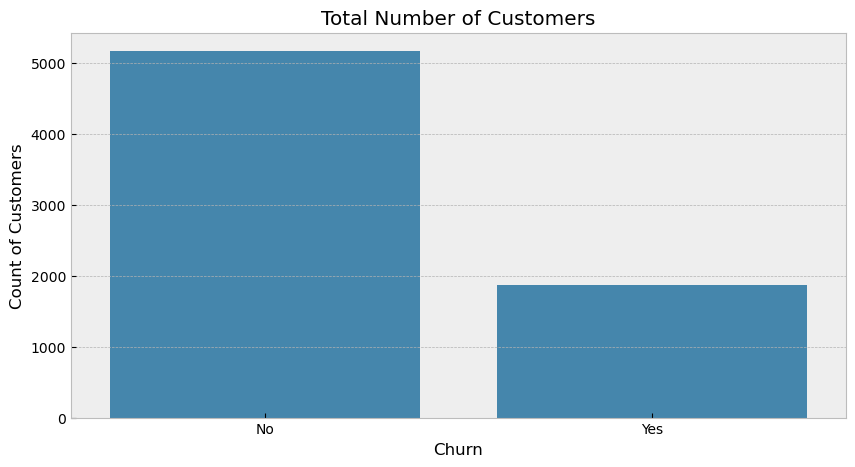

In [12]:
# Investigating 
plt.figure(figsize = (10,5))
sns.countplot(x="Churn", data=df)
plt.xlabel("Churn")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customers")

## Narrations
* The YES of a value (1869) represent customers who have churned (i.e., discontinued their service).
* The NO of a value (5174) represent customers who have not churned (i.e., continued their service)

## Relationship between label and some key features

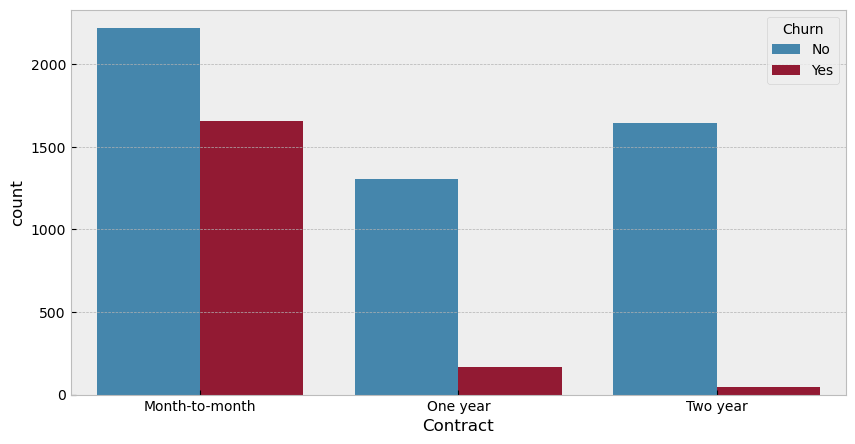

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x="Contract", data=df, hue = "Churn");

## Narrations
* The plot suggest that customers on monthly contracts are the most likely to churn

Reasons
* Price Flexibility: Monthly contracts might offer more flexibility but could also be more expensive than yearly or two-year plans. 
  customers might be more likely to switch if they find a better deal elsewhere.

* Price: Perhaps the contract type with the highest churn is also the most expensive. 
  Customers might be price-sensitive and switching to competitors with lower rates

* Features: The contract type with high churn might lack features or flexibility that customers on other plans find valuable. 
  This could lead them to seek out providers who better meet their needs.

* Commitment: Contract lengths can influence churn. 
  Customers on longer contracts (e.g., two-year) might churn less simply because they're locked in for a period.

<Axes: xlabel='MonthlyCharges', ylabel='Contract'>

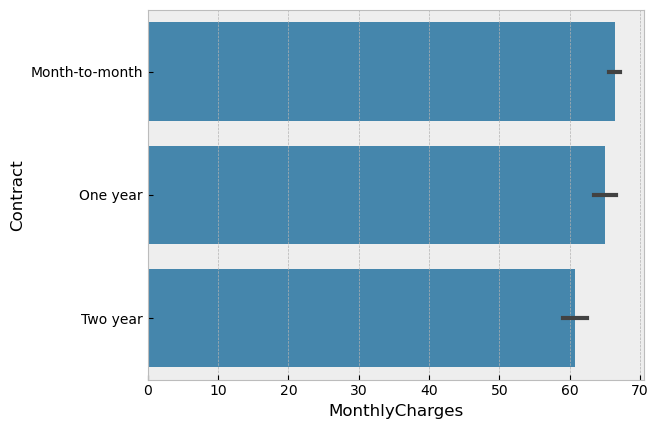

In [14]:
sns.barplot(x="MonthlyCharges", data=df, y="Contract")

## Narrations
* Month-to-month Contract:
Has the widest spread in Monthly Charges, extending almost to 70 euros. it fall into the higher charge range.
follow by the One year contract and the Two year contract has the lowest charges of 60 euros



<Axes: xlabel='Contract', ylabel='count'>

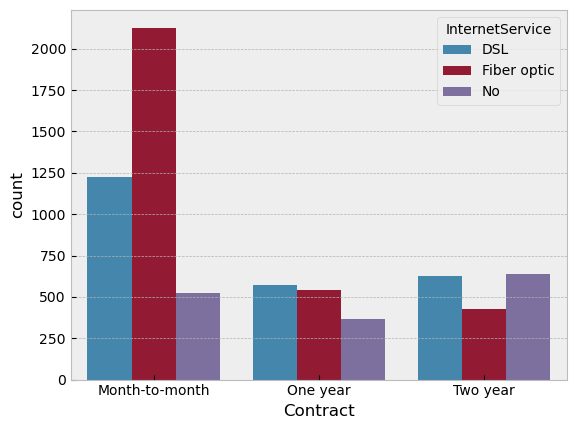

In [15]:
sns.countplot(x="Contract", data=df, hue="InternetService")

## Narrations
Month-to-month Contract:
Has the widest spread in monthly charges. Fiber optic service is the most popular choice for the customers in this category.

One-Year Contract:
Also has a wide spread but fewer instances in the higher charge range compared to month-to-month.
A balanced distribution between DSL and fiber optic services.

Two-Year Contract:
Has the narrowest spread, indicating most charges are on the lower end.
DSL and fiber optic services are more evenly distributed.
Few customers opt for no internet service regardless of the contract duration.

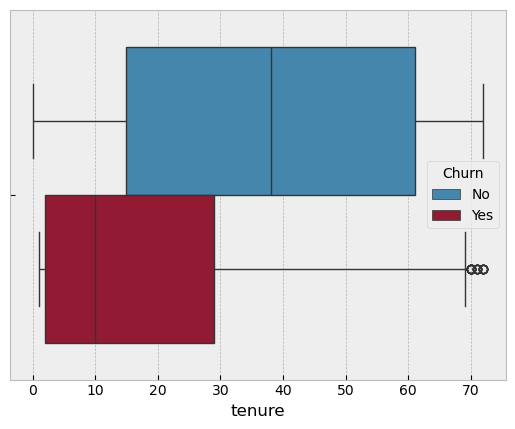

In [25]:
sns.boxplot(x="tenure", data=df,  hue = "Churn");

## Narrations 
* Churn Rate and Tenure:
* The red bar represents customers who have churned (i.e., discontinued their service).
* The blue bars represent customers who have not churned.
* Customers with lower tenure (around 10) have a higher churn rate (indicated by the red bar).
* As the tenure increases to around 30 and above, the churn rate decreases significantly (indicated by the blue bars)

* Customers with longer tenures are less likely to churn.

<Axes: xlabel='MonthlyCharges', ylabel='Contract'>

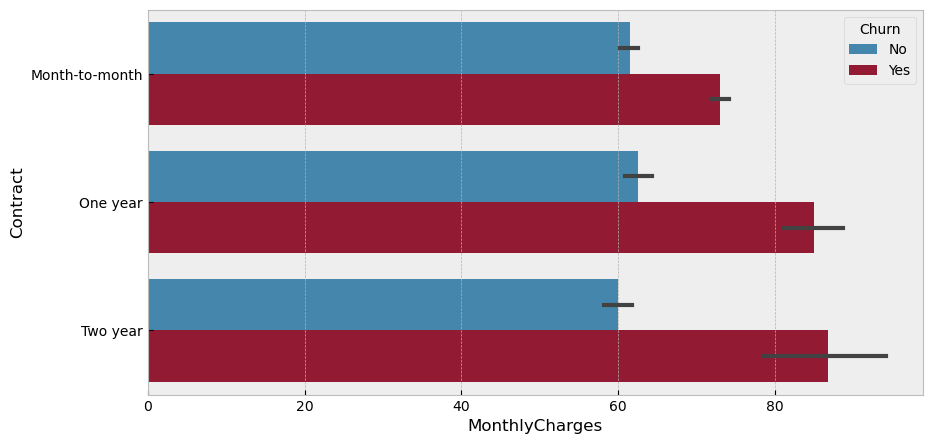

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(x="MonthlyCharges", data=df, y="Contract", hue = "Churn")

<Axes: xlabel='MonthlyCharges', ylabel='InternetService'>

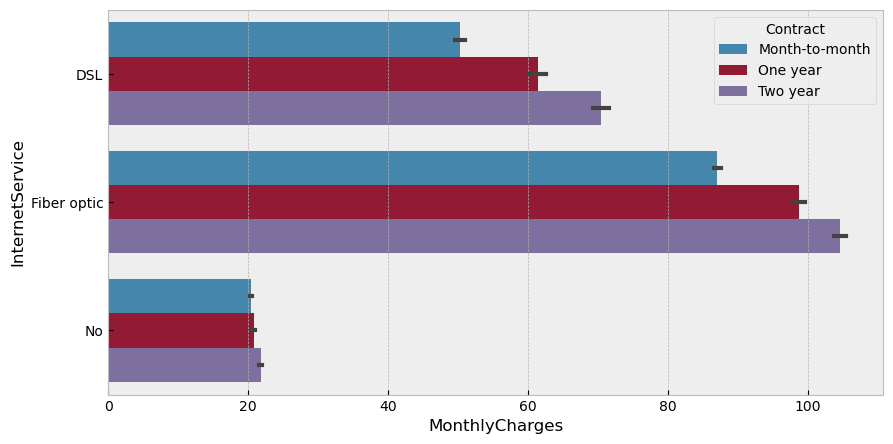

In [17]:
plt.figure(figsize = (10,5))
sns.barplot(x="MonthlyCharges", y= "InternetService", data=df, hue="Contract")

<Axes: xlabel='tenure', ylabel='Contract'>

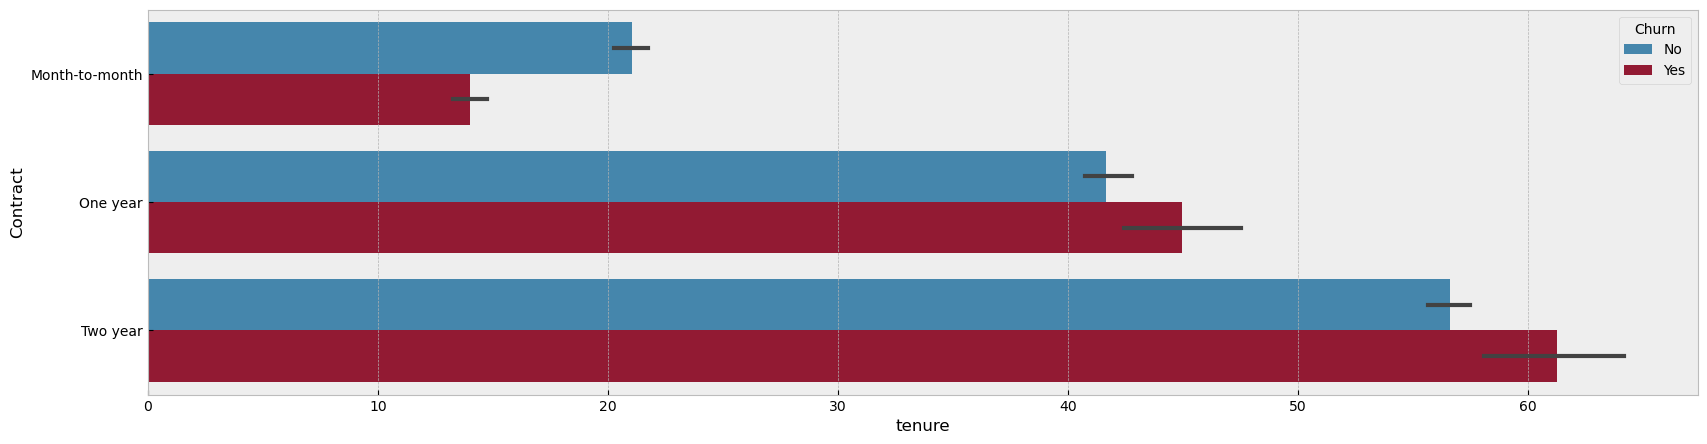

In [18]:
plt.figure(figsize = (20,5))
sns.barplot(x="tenure", y= "Contract", data=df, hue="Churn")

<Axes: xlabel='SeniorCitizen', ylabel='count'>

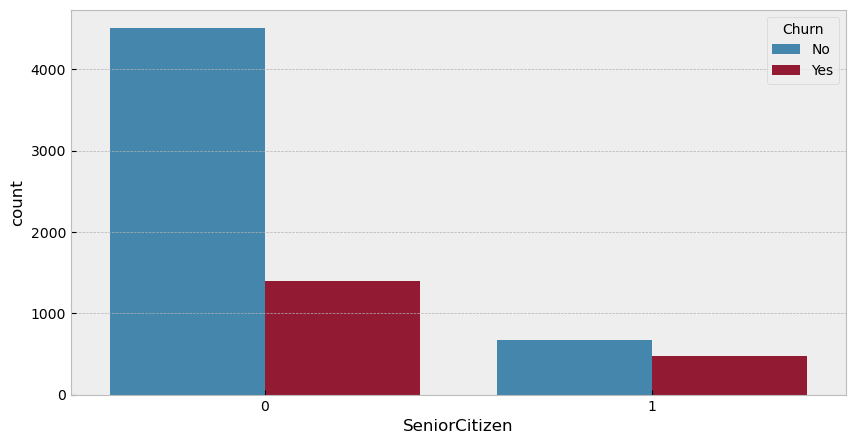

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x="SeniorCitizen", data=df, hue = "Churn")

## Narrations

* SeniorCitizen” has two categories: 0 (non-senior citizens) and 1 (senior citizens).

* Non-Senior Citizens (Category 0):
A large number of non-senior citizens (above 4000) did not churn (blue bar).
A smaller but still notable number (around 1300) did churn (red bar).

* Senior Citizens (Category 1):
Both the blue and red bars are significantly shorter.
This indicates that there are fewer senior citizens in both categories (churned or didn’t churn).

* Implications:
Non-senior citizens have a higher churn rate compared to senior citizens.
The business may need to focus on retaining non-senior citizens to reduce churn.

<Axes: xlabel='PhoneService', ylabel='count'>

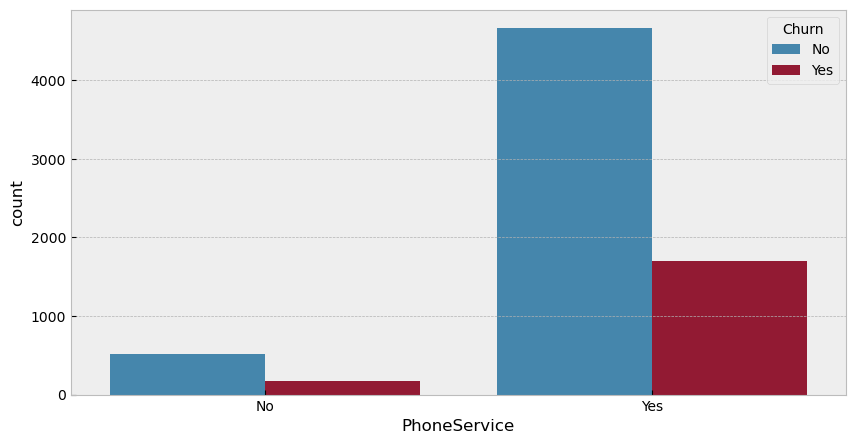

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x="PhoneService", data=df, hue = "Churn")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## Bivariate Analysis



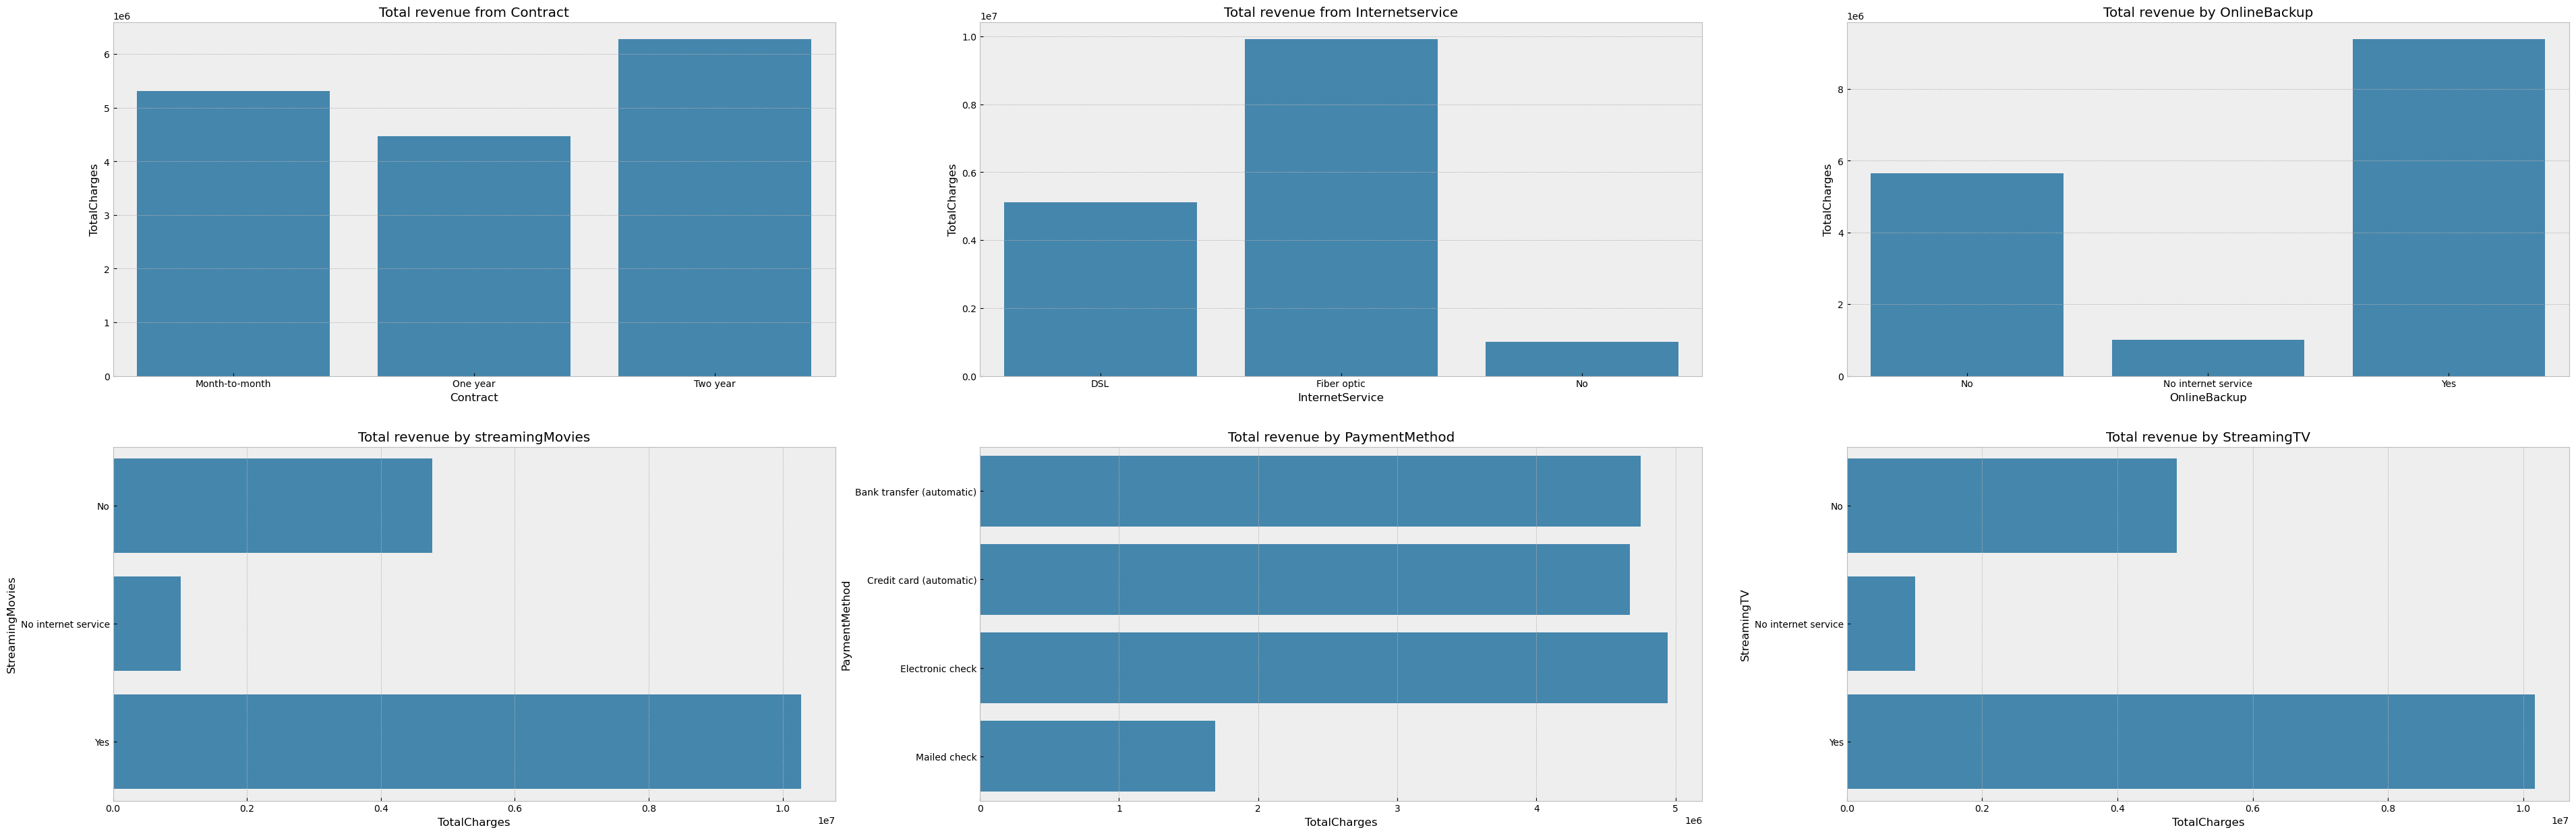

In [67]:
# We want to check the relationshoip between total charges and contract, etc
# "Groupby" look at the contract column and sum all the total charges/revenue

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(47,15))

contr_totchg = df.groupby("Contract")["TotalCharges"].sum().reset_index()
sns.barplot(x="Contract", data=contr_totchg, y="TotalCharges", ax=axs[0,0])
axs[0,0].set_title("Total revenue from Contract");

intser_totchg = df.groupby("InternetService")["TotalCharges"].sum().reset_index()
sns.barplot(x="InternetService", data=intser_totchg, y="TotalCharges", ax=axs[0,1])
axs[0,1].set_title("Total revenue from Internetservice");

onlinebup_totchg = df.groupby("OnlineBackup")["TotalCharges"].sum().reset_index()
sns.barplot(x="OnlineBackup", data=onlinebup_totchg, y="TotalCharges", ax=axs[0,2])
axs[0,2].set_title("Total revenue by OnlineBackup");


strmovies_totchg = df.groupby("StreamingMovies")["TotalCharges"].sum().reset_index()
sns.barplot(y="StreamingMovies", data=strmovies_totchg, x="TotalCharges", ax=axs[1,0])
axs[1,0].set_title("Total revenue by streamingMovies");

paymeth_totchg = df.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()
sns.barplot(y="PaymentMethod", data=paymeth_totchg, x="TotalCharges", ax=axs[1,1])
axs[1,1].set_title("Total revenue by PaymentMethod");

streamTV_totchg = df.groupby("StreamingTV")["TotalCharges"].sum().reset_index()
sns.barplot(y="StreamingTV", data=streamTV_totchg, x="TotalCharges", ax=axs[1,2])
axs[1,2].set_title("Total revenue by StreamingTV");





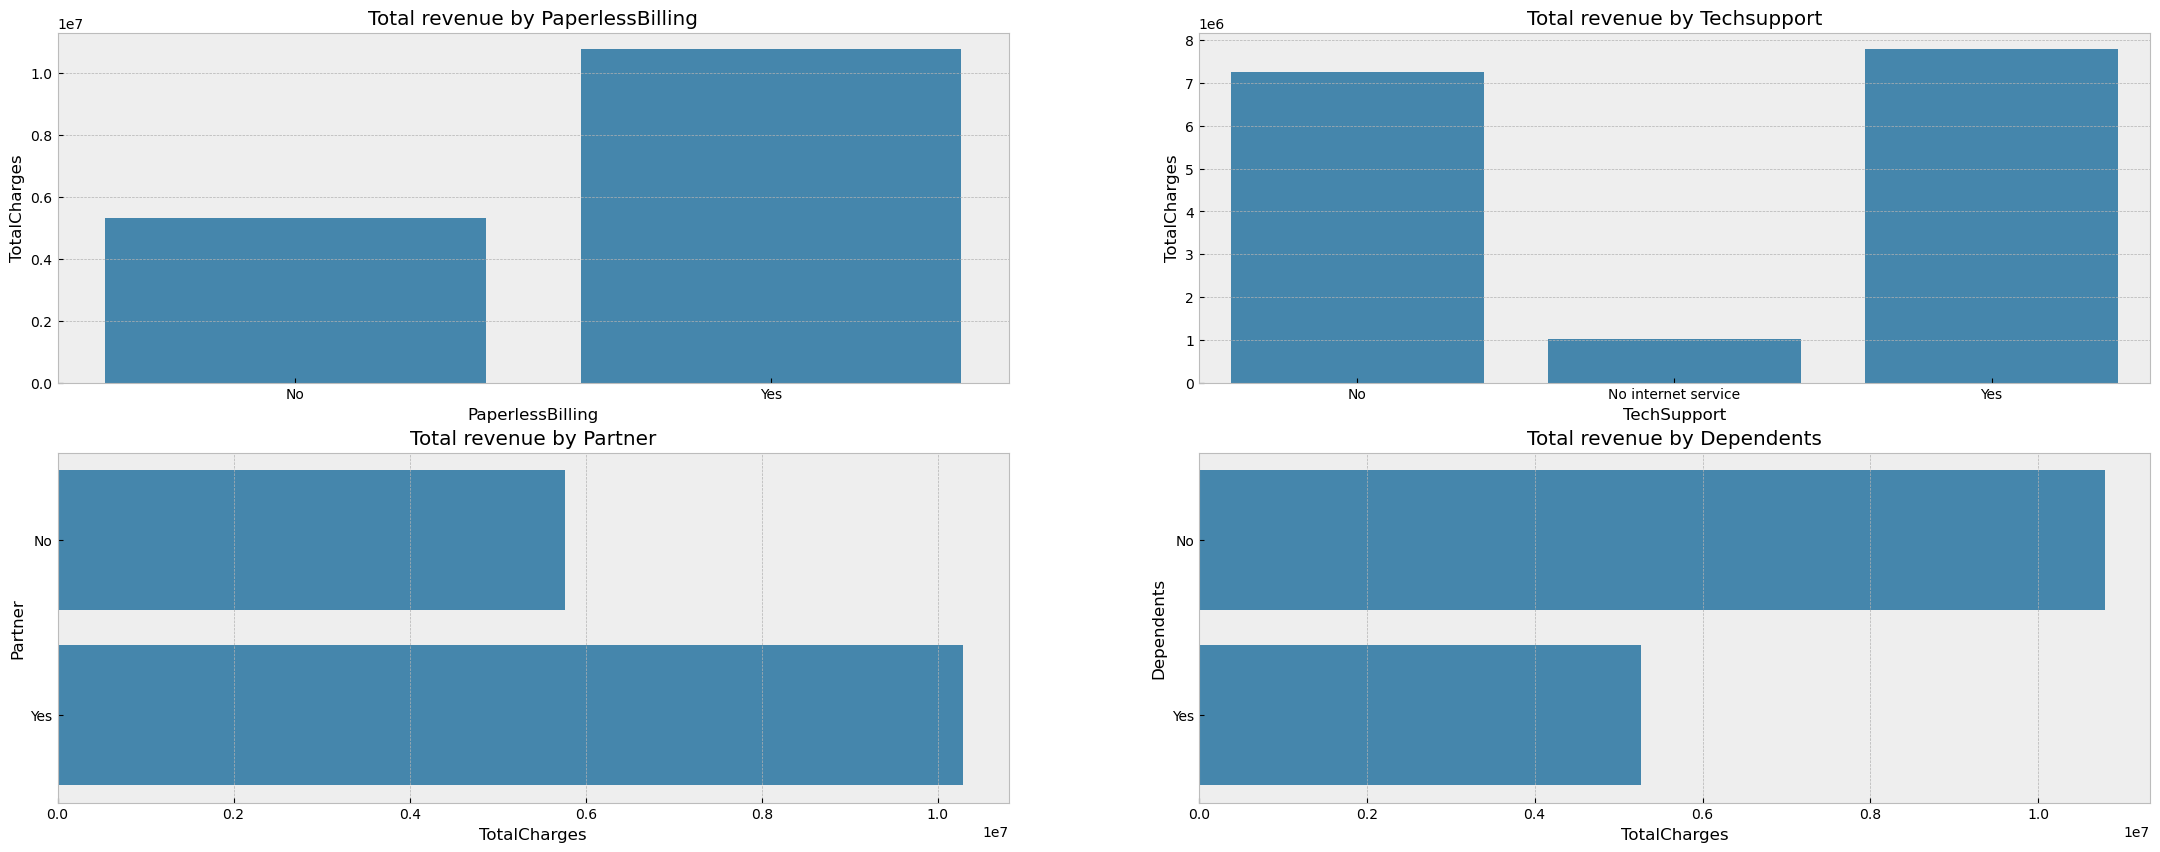

In [61]:
# We want to check the relationship between total charges and PaperlessBilling, etc
# "Groupby" look at the PaperlessBilling column and sum all the total charges/revenue

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(27,10))

paperlb_totchg = df.groupby("PaperlessBilling")["TotalCharges"].sum().reset_index()
sns.barplot(x="PaperlessBilling", data=paperlb_totchg, y="TotalCharges", ax=axs[0,0])
axs[0,0].set_title("Total revenue by PaperlessBilling");

techsup_totchg = df.groupby("TechSupport")["TotalCharges"].sum().reset_index()
sns.barplot(x="TechSupport", data=techsup_totchg, y="TotalCharges", ax=axs[0,1])
axs[0,1].set_title("Total revenue by Techsupport");


partn_totchg = df.groupby("Partner")["TotalCharges"].sum().reset_index()
sns.barplot(y="Partner", data=partn_totchg, x="TotalCharges", ax=axs[1,0])
axs[1,0].set_title("Total revenue by Partner");

depend_totchg = df.groupby("Dependents")["TotalCharges"].sum().reset_index()
sns.barplot(y="Dependents", data=depend_totchg, x="TotalCharges", ax=axs[1,1])
axs[1,1].set_title("Total revenue by Dependents");

## Multivariate Analysis

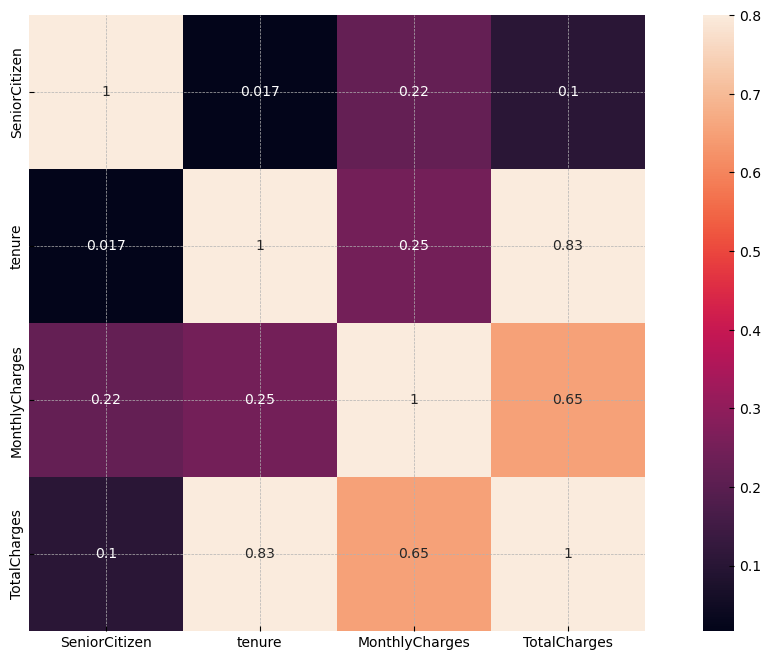

In [26]:
numeric_data = df.select_dtypes(include="number")
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True);

## Narrations

* Tenure vs TotalCharges: There is a strong positive correlation (0.83) between tenure and TotalCharges. As tenure increases, total charges tend to rise.
* MonthlyCharges vs TotalCharges: These two variables have a positive correlation (0.65). Higher monthly charges are associated with higher total charges.
   

## Feature Engineering

In [27]:
# scale dataset features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder




In [28]:
#Create a copy of the data (Exclude churn/label)
df1 = df[["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineBackup", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Contract", "StreamingTV", "StreamingMovies", "TechSupport"]]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,PaymentMethod,MonthlyCharges,TotalCharges,Contract,StreamingTV,StreamingMovies,TechSupport
0,Female,0,Yes,No,1,No,No phone service,DSL,Yes,Electronic check,29.85,29.85,Month-to-month,No,No,No
1,Male,0,No,No,34,Yes,No,DSL,No,Mailed check,56.95,1889.50,One year,No,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Mailed check,53.85,108.15,Month-to-month,No,No,No
3,Male,0,No,No,45,No,No phone service,DSL,No,Bank transfer (automatic),42.30,1840.75,One year,No,No,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,Electronic check,70.70,151.65,Month-to-month,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,No,Mailed check,84.80,1990.50,One year,Yes,Yes,Yes
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Credit card (automatic),103.20,7362.90,One year,Yes,Yes,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,No,Electronic check,29.60,346.45,Month-to-month,No,No,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,Mailed check,74.40,306.60,Month-to-month,No,No,No


In [29]:
#encode the categorical features to numerical ones
df2 = pd.get_dummies(df1,drop_first=True)


In [30]:
# instantiate scaler object// Normalization
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No internet service,TechSupport_Yes
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,1.0,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
# Creating a new column 
def label(ch):
    if ch == "Yes":
        return "1"
    else:
        return "0"
    
df["label"] = df["Churn"].apply(label)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [33]:
churn = df[["label"]]

In [34]:
churn

,label
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [35]:
churn.dtypes

label    object
dtype: object

In [36]:
#from sklearn.preprocessing import LabelEncoder



In [37]:
le = LabelEncoder()
df["churn"] = le.fit_transform(df["label"])

In [38]:
print(df["churn"])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64


In [39]:
# Endcode categorical features to numerical features
labels = pd.get_dummies(churn,drop_first=True)

In [40]:
labels

,label_1
0,False
1,False
2,True
3,False
4,True
...,...
7038,False
7039,False
7040,False
7041,True


In [41]:
scaler = MinMaxScaler()

target = pd.DataFrame(scaler.fit_transform(labels),columns=labels.columns)
target = target.astype(int)
target


,label_1
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [42]:
target.shape

(7043, 1)

In [43]:
#df1

In [44]:
#df2

## Machine Learning

In [45]:
#pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled,target, test_size = 0.2, random_state =42)

In [49]:
X_train.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No internet service,TechSupport_Yes
2142,0.0,0.291667,0.463682,0.152089,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1623,0.0,0.750000,0.785572,0.589736,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6074,0.0,0.013889,0.051741,0.000537,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y_train.head(3)

,label_1
2142,0
1623,0
6074,1


In [51]:
# Impute missing values in the testing set
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  

* first Model Building (Logistic Regression)

In [52]:

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", round(accuracy_score(y_test, ly_pred) * 100, 2), "%")
print("Precision:",round(precision_score(y_test, ly_pred) * 100, 2), "%")
print("Recall:", round(recall_score(y_test, ly_pred) * 100, 2), "%")
print("F1-score:", round( f1_score(y_test, ly_pred) * 100, 2), "%")
print("AUC-ROC:", round(roc_auc_score(y_test, ly_pred) * 100, 2), "%")

Logistic Regression
Accuracy: 81.69 %
Precision: 67.8 %
Recall: 58.71 %
F1-score: 62.93 %
AUC-ROC: 74.34 %


## Narrations for Logistic Regression

1) Accuracy:
* The model predicts correctly the outcome for approximately 81.69% of customers compare to Random Forest Classifier and KNeighborsClassifier.

2) Precision:
* A precision of 67.8% suggests that the model predicts a positive outcome

3) Recall:
* A recall of 58.71% indicates that the model identifies approximately 58.71% of the actual positive customers.

4) F1-score:
*  A value of 62.93% suggests a reasonable balance between precision and recall.

5) AUC-ROC:
* An AUC-ROC of 74.34% indicates that the model performs reasonably well

* Creating a confusion matrix for Logistic Regression

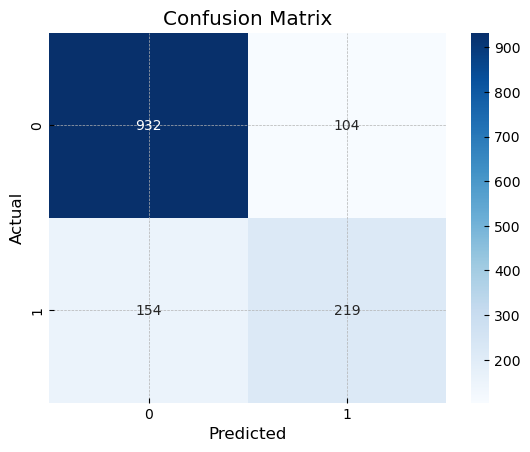

In [53]:

lcm = confusion_matrix(y_test,ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Narrations
1) True Positives (TP):
* There are 219 true positives (correctly predicted positive cases).

2) True Negatives (TN):
* There are 932 true negatives (correctly predicted negative cases).

3) False Positives (FP):
* There are 104 false positives

4) False Negatives (FN):
* There are 154 false negatives



* Second Model Building (Random Forest Classifier)

In [70]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", round(accuracy_score(y_test, rfy_pred) * 100, 2), "%")
print("Precision:", round(precision_score(y_test, rfy_pred) * 100, 2), "%")
print("Recall:", round(recall_score(y_test, rfy_pred)* 100, 2), "%")
print("F1-score:", round(f1_score(y_test, rfy_pred)* 100, 2), "%")
print("AUC-ROC:", round(roc_auc_score(y_test, rfy_pred)* 100, 2), "%")

Logistic Regression
Accuracy: 79.28 %
Precision: 65.28 %
Recall: 46.38 %
F1-score: 54.23 %
AUC-ROC: 68.75 %


* Creating a confusion matrix for Random Forest Classifier

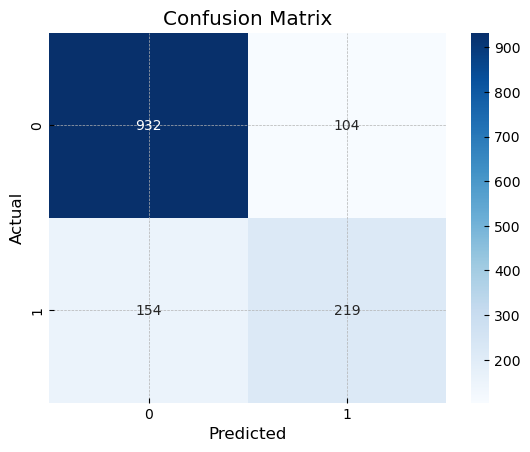

In [71]:

rcm = confusion_matrix(y_test,ly_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

* Third Model Building  (KNeighborsClassifier)

In [56]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
kny_pred = knc.predict(X_test)

print("KNeighborsClassifier")
print("Accuracy:", round(accuracy_score(y_test, rfy_pred) * 100, 2), "%")
print("Precision:", round(precision_score(y_test, rfy_pred) * 100, 2), "%")
print("Recall:", round(recall_score(y_test, rfy_pred)* 100, 2), "%")
print("F1-score:", round(f1_score(y_test, rfy_pred)* 100, 2), "%")
print("AUC-ROC:", round(roc_auc_score(y_test, rfy_pred)* 100, 2), "%")

KNeighborsClassifier
Accuracy: 78.85 %
Precision: 63.44 %
Recall: 47.45 %
F1-score: 54.29 %
AUC-ROC: 68.8 %


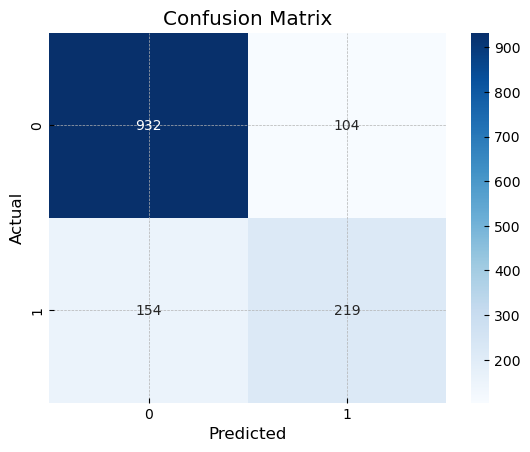

In [57]:
# Creating a confusion matrix for KNeighborsClassifier
kcm = confusion_matrix(y_test,ly_pred)

# visualize the confusion matrix
sns.heatmap(kcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Conclusion and Overall Objectives
I think the business should be more focus on minimizing the false Negative compare to the true positive.

Reasons:
1) Missing a customer who is likely to churn (false negative) can result in revenue loss. ConnectTel would need to detect potential churners early to prevent them from leaving.
2) it can result to customer dissatisfaction.
3) it can also result to brand reputation impact.

## Overall Objectives
* Maximizing Customer Retention
* Efficient Resource Allocation